In [1]:
pip install --upgrade numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


F:\Python\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
playstore = pd.read_csv('googleplaystore.csv')

In [4]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
condition = playstore[playstore['Category'] == '1.9'].index  # .index will retrieve the index #(s) where the condition stands 
                                                             # true, thus in this case 10472 index # will be stored in condition
playstore.drop(condition,inplace = True)
playstore[playstore['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [6]:
playstore['Reviews'] = pd.to_numeric(playstore['Reviews'])

In [7]:
playstore['Installs'] = playstore['Installs'].str.strip("+").str.replace(",","").astype(int)
playstore['Price'] = playstore['Price'].str.strip('$') # removing $ sign through strip method of string
playstore['Price'] = pd.to_numeric(playstore['Price'])  #we have to remove $ sign to make price float

### Task : Best & worst Rating app of each Category

In [8]:
sorted_data = playstore.sort_values(['Category','Rating'],ascending = [True,False]) 

# sorting data first by category then rating

In [9]:
Top_rated = sorted_data.groupby('Category').first()[['App','Rating','Price']]   # applying groupby on category and getting 
                                                                                # 'App,Rating,Price' of first row of sorted data
Top_rated

,App,Rating,Price
Category,,,
ART_AND_DESIGN,Spring flowers theme couleurs d t space,5.0,0.00
AUTO_AND_VEHICLES,Tickets SDA 2018 and Exam from the State Traff...,4.9,0.00
BEAUTY,"ipsy: Makeup, Beauty, and Tips",4.9,0.00
BOOKS_AND_REFERENCE,R Programing Offline Tutorial,5.0,0.00
BUSINESS,Ag Valley Cooperative,5.0,0.00
COMICS,Hojiboy Tojiboyev Life Hacks,5.0,0.00
COMMUNICATION,BS-Mobile,5.0,0.00
DATING,American Girls Mobile Numbers,5.0,0.00
EDUCATION,"Learn Japanese, Korean, Chinese Offline & Free",4.9,0.00


In [10]:
# The most valueable App is 'Hey AJ! It's Bedtime!':
sorted_data = playstore.sort_values(['Category','Rating'],ascending = [True,False]) 
Top_rated = sorted_data.groupby('Category').first()[['App','Rating','Price','Installs']]

Top_rated[(Top_rated['Price'] > 0)]

,App,Rating,Price,Installs
Category,,,,
FAMILY,Hey AJ! It's Bedtime!,5.0,4.99,10
MEDICAL,Super Hearing Secret Voices Recorder PRO,5.0,2.99,100
PERSONALIZATION,P-Home for KLWP,5.0,0.99,100
TOOLS,ADS-B Driver,5.0,1.99,100


In [11]:
sorted_data = playstore.sort_values(['Category','Rating'],ascending = [True,True]) 
Least_rated = sorted_data.groupby('Category').first()[['App','Rating','Price','Installs']]
Least_rated

,App,Rating,Price,Installs
Category,,,,
ART_AND_DESIGN,Learn To Draw Kawaii Characters,3.2,0.00,5000
AUTO_AND_VEHICLES,EZ-ELD Driver App (Free),2.1,0.00,5000
BEAUTY,AI Face Beauty Analysis - IntelliFace (Free),3.1,0.00,10000
BOOKS_AND_REFERENCE,Bilingual Dictionary Audio App,2.7,0.00,5000
BUSINESS,CR Magazine,1.0,0.00,100
COMICS,AF Comics Reader - Free,2.8,0.00,100
COMMUNICATION,CJ DVD Rentals,1.0,0.00,100
DATING,House party - live chat,1.0,0.00,10
EDUCATION,EasyBib: Citation Generator,3.5,0.00,100000


In [12]:
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [13]:
mapping = {'Installs':'Downloads','App':'Application','Android Ver':'Minimum_version'}  # mapping for column names changing

In [14]:
playstore.rename(columns = mapping, inplace = True)              # renaming the column names
playstore

,Application,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Minimum_version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [15]:
playstore['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10840, dtype: float64

In [16]:
# Adding a column, based on Rating comments and extracting counts against each Rating comment

def criteria (element):
    if element > 4.0:
        return('Top Rated')
    elif element > 2.5:
        return('Average')
    else:
        return('Low Rated')

In [17]:
playstore['Rating'].map(criteria)     #applying mapping on Rating column through function we've created

0        Top Rated
1          Average
2        Top Rated
3        Top Rated
4        Top Rated
           ...    
10836    Top Rated
10837    Top Rated
10838    Low Rated
10839    Top Rated
10840    Top Rated
Name: Rating, Length: 10840, dtype: object

In [18]:
playstore['Remarks'] = playstore['Rating'].map(criteria) # adding new column
playstore['Remarks']

0        Top Rated
1          Average
2        Top Rated
3        Top Rated
4        Top Rated
           ...    
10836    Top Rated
10837    Top Rated
10838    Low Rated
10839    Top Rated
10840    Top Rated
Name: Remarks, Length: 10840, dtype: object

In [19]:
playstore.head()

,Application,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Minimum_version,Remarks
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Top Rated
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Average
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Top Rated
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Top Rated
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Top Rated


In [20]:
playstore['Remarks'].value_counts()       # frequency of each remarks category

Top Rated    6800
Average      2416
Low Rated    1624
Name: Remarks, dtype: int64

In [21]:
Category = playstore.groupby('Category')        # groupby of Category

In [22]:
Category['Remarks'].value_counts()

Category           Remarks  
ART_AND_DESIGN     Top Rated    52
                   Average      10
                   Low Rated     3
AUTO_AND_VEHICLES  Top Rated    46
                   Average      26
                                ..
VIDEO_PLAYERS      Average      56
                   Low Rated    19
WEATHER            Top Rated    56
                   Average      19
                   Low Rated     7
Name: Remarks, Length: 98, dtype: int64

In [23]:
Category.get_group('GAME')['Remarks'].value_counts()

Top Rated    893
Average      199
Low Rated     52
Name: Remarks, dtype: int64

In [24]:
def criteria (element,top = 4.5,avg = 2.5):                         #setting function where user can apply different criteria range 
    if element > top:
        return('Top Rated')
    elif element > avg:
        return('Average')
    else:
        return('Low Rated')

In [25]:
criteria(3,top =4.5,avg = 3)           # checking function 

'Low Rated'

In [26]:
playstore['Rating'].map(criteria, top = 4.5)          
# .map() cannot perform if multiple arguments exist in a function, hence we use .apply()


TypeError: map() got an unexpected keyword argument 'top'

In [ ]:
playstore['Rating'].apply(criteria, top = 4.5, avg = 3.5)

In [ ]:
playstore['Remarks'] = playstore['Rating'].apply(criteria, top = 4.5, avg = 3.5)   #updating our column with new criteria

In [ ]:
playstore.head()

<AxesSubplot:>

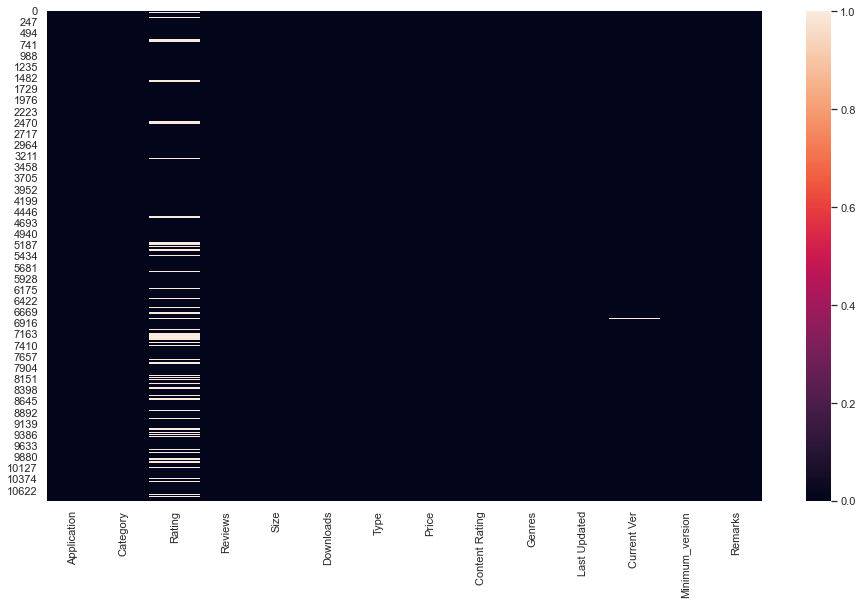

In [43]:
# Relationship between Price & Rating

sns.set(rc={'figure.figsize':(16,9)})
sns.heatmap(playstore.isnull())
